# Toss a Coin

Toss a coin for $32$ times, and $16$ of results are head. Does that prove the probability of head each time tossing a coin is $1/2$?

Suppose the probability of head is $p$. Let $A$ be "16 heads out of 32 tossing". We have:
$$
P(A) = {32\choose 16} p^{16}(1-p)^{16}
$$
Let's draw a graph to see how $P(A)$ changes with respect to $p$.

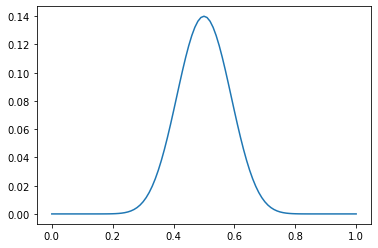

In [1]:
import numpy as np
from math import comb
from matplotlib import pyplot as plt

p = np.linspace(0, 1, 101)
pa = comb(32, 16) * np.power(p, 16) * np.power(1 - p, 16)

plt.plot(p, pa)

It seems:
1. $p$ is most likely to be $1/2$.
2. Probability of $p$ being in somewhere around $1/2$ is pretty high.

This is method is called maximum likelihood. Suppose we know the parameter ($p$ in this case), and we calculate the probability of the observation ($A$ in this case). $P(A)$ is a function of $p$, and we call it likelihood function, i.e.
$$
L(p) = P(A; p) = {32\choose 16} p^{16}(1-p)^{16}
$$
Then we find a value of $p$ to maximize the likelihood function $L(p)$, and that value should be a decent estimation of $p$.

More tossing will have a better result.

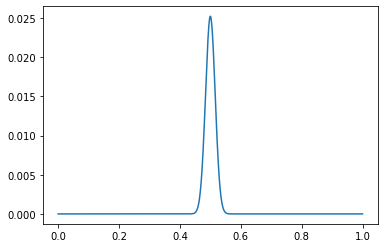

In [5]:
p = np.linspace(0, 1, 1001)
pa = comb(1000, 500) * np.power(p, 500) * np.power(1 - p, 500)

plt.plot(p, pa)

Using maximum likelihood seems fine. But what about other estimators? Let's try MMSE (minimum mean square error) estimator.
$$
\hat{p}_{MMSE} = E(p | A)
$$
We need a prior distribution of $p$. Let's say $p\sim U[0,1]$. The consider distribution function for $p$ given $A$:
$$
\begin{aligned}
f_{p|A}(x) &= \frac{P(A|p=x)f_p(x)}{\int_{0}^{1}P(A|p=y)f_p(y)dy} \\
&= \frac{L(x)}{\int_{0}^{1}L(y)dy}
\end{aligned}
$$
Then
$$
\begin{aligned}
\hat{p}_{MMSE} &= E(p | A) \\
&= \int_{0}^{1} x f_{p|A}(x) dx \\
&= \frac{\int_{0}^{1}xL(x) dx}{\int_{0}^{1}L(y)dy} \\
&= \frac{\int_{0}^{1}x^{17}(1-x)^{16} dx}{\int_{0}^{1}y^{16}(1-y)^{16}dy} \\
&= \frac{1}{2}
\end{aligned}
$$
Therefore, MMSE estimator gives the same result.